## Dimension problem
**1) Space  domain $\mathcal{X} \subset \mathbb{R}^d, d\in \mathbb{N}, d\neq 0$.**

**2) Time domain $ t \in [0, \infty)$**. 
Let us put some precisions: Let us consider the PDE
$$
\begin{cases}
\partial_t u(t,x)=f(t,x,u)\quad \textrm{for} \;\; (t,x)\in [0,\infty)\times {\cal X}\\
u(0,x)=u_0(x)\quad \;\; x \in {\cal X}
\end{cases}$$
where $u \in {\cal U}$ a function space. 

$$ f: [0,\infty)\times {\cal X}\times {\cal U}\longrightarrow {\mathbb R}
$$
and $f(t,x,u)=b(t,x) \cdot\nabla u+a(t,x):\nabla\nabla u+ G(t,x,u)$ for some $b:[0,\infty)\times {\cal X} \longrightarrow {\mathbb R}^d, a: [0,\infty)\times {\cal X} \longrightarrow {\mathbb R}^d\times {\mathbb R}^d$ and $G: [0,\infty)\times {\cal X}\times {\mathbb R} \longrightarrow {\mathbb R}$.


 We assume that $\mathcal{X} = \Pi_{j=1}^d[a_j,b_j]$ and a sampling in $j$ axis has $n_j$ points. Then the discrete $\mathcal{X}$  will be like **torch.tensor()** of dimension $n_1\times n_2\times n_3\times\dots\times n_d$. The PDE classes are created such that one must input a 2D sampling with $n$ rows and $d$ columns like
$$
X=\begin{pmatrix}
x^1\\
x^2\\
\vdots\\
x^n
\end{pmatrix},
$$
where $x^i=(x_1^i,x_2^i,\dots,x_d^i), t \in \mathbb{R}^+$. The output will be 
$$
f(t,X,u)=\begin{pmatrix}
f(t,x^1,u)\\
f(t,x^2,u)\\
\vdots\\
f(t,x^n,u)
\end{pmatrix}$$




In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path)

import torch
from lib.PDE import KdV,AllenCahn,AD

## Text case for KDV Eq

KdV eq: $$
\partial_t u=-\partial^3_xu+6u\partial_xu$$

In this case test, we asssume that $u_0(x)=\sin(x)$ and $u(t,x)=\sin(2*x)-\cos(t*x)$.
We set $t \in (0,1)$ and $x \in [0,\pi]$



## 1D example

In [4]:
import matplotlib.pyplot as plt
def u0(x):
    return torch.sin(x)

ntrain = 100

KDV=KdV(u0)

def u(t,x):
    return t*torch.sin(2*x)-torch.cos(t*x)
    
def f_function(t,x,u):
        if t==0:
             return torch.cos(x)+3*torch.sin(2*x)
        else:
            return 8*t*torch.cos(2*x)+(torch.sin(t*x))*t**3+6*(t*torch.sin(2*x)-torch.cos(t*x))*(2*t*torch.cos(2*x)+t*torch.sin(t*x))
            #return 5.e-2*2*t*torch.ones(len(x))-(1.05+t*torch.sin(x))*(u(t,x)-u(t,x)**3)

nbr_time_point=20
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=40
space_point=torch.linspace(0,torch.pi,nbr_space_point)



# For t=0
t=time_point[0]
x=space_point.unsqueeze(1)
y_KDV=KDV.f(t,x,u).clone().detach()
y_f=f_function(t,x,u).clone().detach()


torch.Tensor.ndim = property(lambda self: len(self.shape)) 
plt.figure(1)
plt.subplot(211)
plt.title("For t=0")
fig_t01,=plt.plot(x,y_KDV,color='blue',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t02,=plt.plot(x,y_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t01,fig_t02],['KDV_f approx','Exact f'])
#For t different to 0
# Position 
t=time_point[10]
y1_KDV=KDV.f(t,x,u).clone().detach()
y1_f=f_function(t,x,u).clone().detach()
plt.subplot(212)
plt.title("For t>0")
fig_t1,=plt.plot(x,y1_KDV,color='blue',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t2,=plt.plot(x,y1_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['KDV_f approx','Exact f'])

plt.show()

TypeError: u() missing 1 required positional argument: 'x'

## High dimension example
Here, we take $$u(t,x)=(t^2+t)\left< x,x\right> \qquad \textrm{and }\;\; u_0(x)=\left< x,x\right>.$$

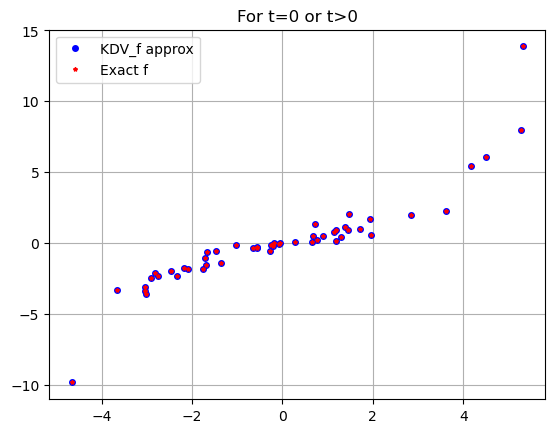

In [3]:

def u0(x):
    part = torch.dot(x,x)
    return part

KDV=KdV(u0)

def u(t,x):
    return (t**2+t)*torch.dot(x,x)
    
def f_function(t,x,u):
    if t==0:
        iter=0
        funct=torch.zeros(len(x))
        for x_ in x: 
            funct[iter]=12*u0(x_)*x_.sum()
            iter=iter+1
    else:
        iter=0
        funct=torch.zeros(len(x))
        for x_ in x: 
            funct[iter]=12*u(t,x_)*(t**2+t)*x_.sum()
            iter=iter+1

    return funct
        

nbr_time_point=10
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=50
dimension=5
space_point=torch.randn(nbr_space_point,dimension)


###################################################

torch.Tensor.ndim = property(lambda self: len(self.shape)) 
x=space_point
#For t different to 0
# Position 
t=time_point[1]
y1_KDV=KDV.f(t,x,u).clone().detach()
y1_f=f_function(t,x,u).clone().detach()
#plt.subplot(212)
"""Here we want just to understand how close the approximation is to the exacte function
Then we plot the approximation and the exacte function for x=x.sum()"""
x_=x.sum(dim=1)
plt.title("For t=0 or t>0")
fig_t1,=plt.plot(x_,y1_KDV,color='blue',marker='o',linestyle='None',linewidth=1,markersize=4)
fig_t2,=plt.plot(x_,y1_f,color='red',marker='*',linestyle='None',linewidth=1,markersize=3)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['KDV_f approx','Exact f'])
plt.show()




## Test case for Allen-Cahn eq:
$$
\partial_t u=\epsilon\partial_x^2u -a(t,x)(u-u^3)\quad
 u_0(x)=\sin(x)
$$
where 
$\epsilon=5\times 10^{-2}, a(t,x)=1.05+t\sin(x)$, $t\in (0,1)$ and $x \in [0,2\pi)$.

## 1D Example

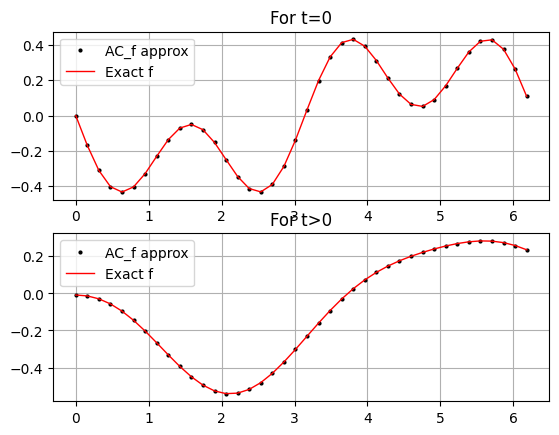

In [76]:
""""
Domain case
"""


def u0(x):
    return torch.sin(x)

AC=AllenCahn(u0)

def u(t,x):
    #return torch.cos(t*x)
    return torch.cos(t*x)

epsilon=5e-2
def f_acfunction(t,x,u):
        if t==0:
             return -epsilon*u0(x)-(1.05+t*torch.sin(x))*(u0(x)-u0(x)**3)
        else:
            return -epsilon*(t**2)*u(t,x)-(1.05+t*torch.sin(x))*(u(t,x)-u(t,x)**3)
        
nbr_time_point=20
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=40
space_point=torch.linspace(0,2*torch.pi-1e-1,nbr_space_point)


        
t=time_point[0]
x=space_point
y_AC=AC.f(t,x,u).clone().detach()
y_f=f_acfunction(t,x,u).clone().detach()


torch.Tensor.ndim = property(lambda self: len(self.shape)) 
plt.figure(1)
plt.subplot(211)
plt.title("For t=0")
fig_t01,=plt.plot(x,y_AC,color='black',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t02,=plt.plot(x,y_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t01,fig_t02],['AC_f approx','Exact f'])
#For t different to 0
# Position 
t=time_point[8]
y1_AC=AC.f(t,x,u).clone().detach()
y1_f=f_acfunction(t,x,u).clone().detach()
plt.subplot(212)
plt.title("For t>0")
fig_t1,=plt.plot(x,y1_AC,color='black',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t2,=plt.plot(x,y1_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['AC_f approx','Exact f'])

plt.show()



## Advection Difusion problem 
$$
    \partial_tu=-a(t,x)\partial_xu$$
1) **The case where $a$ depends only on $t$**
    $$
        a(t,x)=a_s\odot(\sin(a_v\pi t)+5/4)
    $$
    with $a_s=[1,2,\dots,d]^T, a_v=2+\frac{2}{d}[0,1,\dots,d-1]^T$ and  $\odot$ the element-wise vector multiplication .
## 1D example


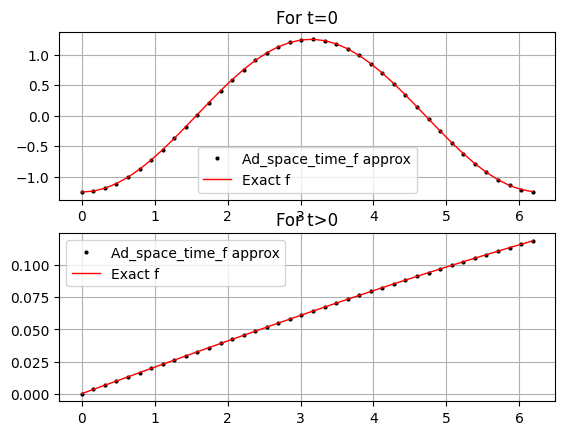

In [77]:
def u0(x):
    return torch.sin(x)

Ad_time=AD(u0,"time_only")

def u(t,x):
    return torch.cos(t*x)

def funct_a(t,x):
    x1=x[0].clone()
    if x1.shape==torch.Size([]):
        a_s=1
        a_v=2
    else:
        a_s=torch.arange(1,len(x)+1)
        a_v=2+2*torch.arange(0,len(x))
    #return a_s*(torch.sin(a_v*torch.pi*t)+3)*(x+1)/10
    return -a_s*(torch.sin(a_v*torch.pi*t)+5/4)

def ad_function_time(t,x):
    if t==0:
        return funct_a(t,x)*torch.cos(x)

    else:
        return -t*funct_a(t,x)*torch.sin(t*x)




nbr_time_point=20
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=40
space_point=torch.linspace(0,2*torch.pi-1e-1,nbr_space_point)


        
t=time_point[0]
x=space_point
y_Ad_time=Ad_time.f(t,x,u).clone().detach()
y_f=ad_function_time(t,x).clone().detach()


torch.Tensor.ndim = property(lambda self: len(self.shape)) 
plt.figure(1)
plt.subplot(211)
plt.title("For t=0")
fig_t01,=plt.plot(x,y_Ad_time,color='black',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t02,=plt.plot(x,y_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t01,fig_t02],['Ad_space_time_f approx','Exact f'])
#For t different to 0
# Position 
t=time_point[2]
y1_Ad_time=Ad_time.f(t,x,u).clone().detach()
y1_f=ad_function_time(t,x).clone().detach()
plt.subplot(212)
plt.title("For t>0")
fig_t1,=plt.plot(x,y1_Ad_time,color='black',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t2,=plt.plot(x,y1_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['Ad_space_time_f approx','Exact f'])

plt.show()




## High dimension example


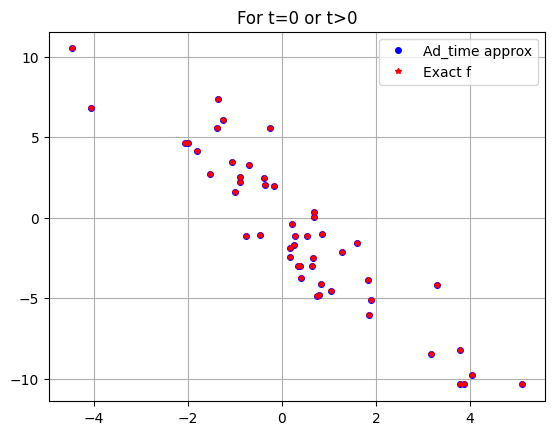

In [78]:
def u0(x):
    return torch.dot(x,x)

Ad_d_time=AD(u0,"time_only")

def u(t,x):
    return (t**2+1)*torch.dot(t*x,x)
    
def function_test_ad_d_time(t,x):
    funct=torch.zeros(len(x))
    if t==0:
        iter=0
        
        for x_ in x: 
            x1=x[0].clone()
            if x1.shape==torch.Size([]):
                a_s=1
                a_v=2
            else:
                a_s=torch.arange(1,len(x_)+1)
                a_v=2+2*torch.arange(0,len(x_))/len(x_)
            a=-a_s*(torch.sin(a_v*torch.pi*t)+5/4)
            funct[iter]=2*torch.dot(a,x_)
            iter=iter+1
    else:
        iter=0
        for x_ in x: 
            x1=x[0].clone()
            if x1.shape==torch.Size([]):
                a_s=1
                a_v=2
            else:
                a_s=torch.arange(1,len(x_)+1)
                a_v=2+2*torch.arange(0,len(x_))/len(x_)
            a=-a_s*(torch.sin(a_v*torch.pi*t)+5/4)
            funct[iter]=(t**2+1)*t*2*torch.dot(a,x_)
            iter=iter+1
    return funct
        

nbr_time_point=10
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=50
dimension=4
space_point=torch.randn(nbr_space_point,dimension)


###################################################
#return x[0]**2-x[1]**3-1
torch.Tensor.ndim = property(lambda self: len(self.shape)) 

#For t different to 0
# Position 
t=time_point[2]
y1_Ad_time1=Ad_d_time.f(t,space_point,u).clone().detach()
y1_f2=function_test_ad_d_time(t,space_point).clone().detach()
#plt.subplot(212)
"""Here we want just to understand how close the approximation is to the exacte function
Then we plot the approximation and the exacte function for x=x.sum()"""

x_=space_point.sum(dim=1)
plt.title("For t=0 or t>0")
fig_t1,=plt.plot(x_,y1_Ad_time1,color='blue',marker='o',linestyle='None',linewidth=1,markersize=4)
fig_t2,=plt.plot(x_,y1_f2,color='red',marker='*',linestyle='None',linewidth=1,markersize=4)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['Ad_time approx','Exact f'])
plt.show()



## Advection Difusion problem 
$$
    \partial_tu=-a(t,x)\partial_xu$$
2) **The case where $a$ depends on $t$ and $x$**
    $$
        a(t,x)=a_s\odot(\sin(a_v\pi t)+5/4)\odot(x+1)/10
    $$
    with $a_s=[1,2,\dots,d]^T, a_v=2+\frac{2}{d}[0,1,\dots,d-1]^T$ and  $\odot$ the element-wise vector multiplication .


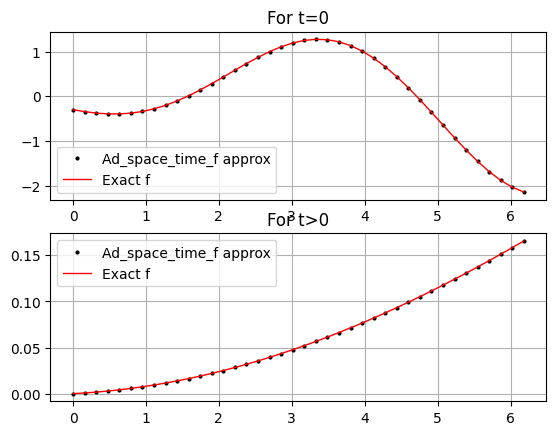

In [79]:
def u0(x):
    return torch.sin(x)

Ad_space_time=AD(u0,"space_time")

def u(t,x):
    return torch.cos(t*x)

def funct_a(t,x):
    x1=x[0].clone()
    if x1.shape==torch.Size([]):
        a_s=1
        a_v=2
    else:
        a_s=torch.arange(1,len(x)+1)
        a_v=2+2*torch.arange(0,len(x))
    return -a_s*(torch.sin(a_v*torch.pi*t)+3)*(x+1)/10

def function_test_ad_space_time(t,x):
    if t==0:
        return funct_a(t,x)*torch.cos(x)

    else:
        return -t*funct_a(t,x)*torch.sin(t*x)




nbr_time_point=20
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=40
space_point=torch.linspace(0,2*torch.pi-1e-1,nbr_space_point)


        
t=time_point[0]
x=space_point
y_ad_space_time=Ad_space_time.f(t,x,u).clone().detach()
y_f=function_test_ad_space_time(t,x).clone().detach()


torch.Tensor.ndim = property(lambda self: len(self.shape)) 
plt.figure(1)
plt.subplot(211)
plt.title("For t=0")
fig_t01,=plt.plot(x,y_ad_space_time,color='black',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t02,=plt.plot(x,y_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t01,fig_t02],['Ad_space_time_f approx','Exact f'])
#For t different to 0
# Position 
t=time_point[2]
y1_Ad_space_time=Ad_space_time.f(t,x,u).clone().detach()
y1_f=function_test_ad_space_time(t,x).clone().detach()
plt.subplot(212)
plt.title("For t>0")
fig_t1,=plt.plot(x,y1_Ad_space_time,color='black',marker='o',linestyle='None',linewidth=1,markersize=2)
fig_t2,=plt.plot(x,y1_f,color='red',marker='None',linestyle='solid',linewidth=1,markersize=2)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['Ad_space_time_f approx','Exact f'])

plt.show()




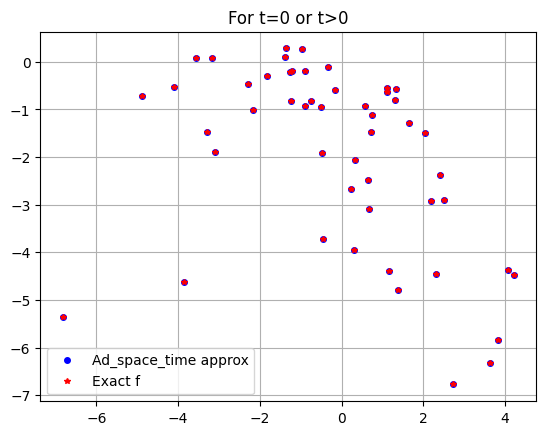

In [80]:
def u0(x):
    return torch.dot(x,x)
    #return x[0]**2-x[1]**3-1

Ad_d_space_time=AD(u0,"space_time")

def u(t,x):
    return (t**2+1)*torch.dot(t*x,x)
    
def function_test_ad_d_space_time(t,x):
    funct=torch.zeros(len(x))
    if t==0:
        iter=0
        
        for x_ in x: 
            x1=x[0].clone()
            if x1.shape==torch.Size([]):
                a_s=1
                a_v=2
            else:
                a_s=torch.arange(1,len(x_)+1)
                a_v=2+2*torch.arange(0,len(x_))/len(x_)
            a=-a_s*(torch.sin(a_v*torch.pi*t)+3)*(x_+1)/10
            funct[iter]=2*torch.dot(a,x_)
            iter=iter+1
    else:
        iter=0
        for x_ in x: 
            x1=x[0].clone()
            if x1.shape==torch.Size([]):
                a_s=1
                a_v=2
            else:
                a_s=torch.arange(1,len(x_)+1)
                a_v=2+2*torch.arange(0,len(x_))/len(x_)
            a=-a_s*(torch.sin(a_v*torch.pi*t)+3)*(x_+1)/10
            funct[iter]=(t**2+1)*t*2*torch.dot(a,x_)
            iter=iter+1
    return funct
        

nbr_time_point=10
time_point=torch.linspace(0,1,nbr_time_point)
nbr_space_point=50
dimension=4
space_point=torch.randn(nbr_space_point,dimension)


###################################################

torch.Tensor.ndim = property(lambda self: len(self.shape)) 

#For t different to 0
# Position 
t=time_point[2]
yd_ad_space_time=Ad_d_space_time.f(t,space_point,u).clone().detach()
yd_f_space=function_test_ad_d_space_time(t,space_point).clone().detach()

#plt.subplot(212)
"""Here we want just to understand how close the approximation is to the exacte function
Then we plot the approximation and the exacte function for x=x.sum()"""

x_=space_point.sum(dim=1)
plt.title("For t=0 or t>0")
fig_t1,=plt.plot(x_,yd_ad_space_time,color='blue',marker='o',linestyle='None',linewidth=1,markersize=4)
fig_t2,=plt.plot(x_,yd_f_space,color='red',marker='*',linestyle='None',linewidth=1,markersize=4)
plt.grid(True)
plt.legend([fig_t1,fig_t2],['Ad_space_time approx','Exact f'])
plt.show()

